In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from wordcloud import WordCloud
from matplotlib.pyplot import figure

In [ ]:
final_pitchfork_scrape_data = pd.read_csv('final_pitchfork_scrape.csv')
albums_data = pd.read_csv('MATCHED_ALBUMS.csv')
artists_data = pd.read_csv('MATCHED_ARTISTS.csv')
features_data = pd.read_csv('MATCHED_FEATUREDS.csv')
tracks_data = pd.read_csv('MATCHED_TRACKS.csv')

# PRE PROCESSING FOR MATH STUFF 
tracks_data['valence'] = tracks_data['valence'] * 100
tracks_data['acousticness'] = tracks_data['acousticness'] * 100
tracks_data['danceability'] = tracks_data['danceability'] * 100
tracks_data['energy'] = tracks_data['energy'] * 100
tracks_data['instrumentalness'] = tracks_data['instrumentalness'] * 100
tracks_data['liveness'] = tracks_data['liveness'] * 100
tracks_data['speechiness'] = tracks_data['speechiness'] * 100
tracks_data['duration_minutes'] = tracks_data['duration'] / 60000
tracks_data['duration_valence'] = tracks_data['valence'] * tracks_data['duration_minutes']
tracks_data['duration_energy'] = tracks_data['energy'] * tracks_data['duration_minutes']
tracks_data['duration_speechiness'] = tracks_data['speechiness'] * tracks_data['duration_minutes']
tracks_data['duration_instrumentalness'] = tracks_data['instrumentalness'] * tracks_data['duration_minutes']
score_data = final_pitchfork_scrape_data[['pitchfork_id', 'score']]
matched_data = albums_data
matched_data = pd.merge(matched_data, score_data, on='pitchfork_id', how='left')
grouped = tracks_data.groupby('pitchfork_id')

# GRABBING MIN, MAX, MEAN, STD_DEV, SUM
df_min = grouped.agg('min').reset_index()
df_max = grouped.agg('max').reset_index()               
df_mean = grouped.agg('mean').reset_index()
df_std = grouped.agg('std').reset_index()
df_var = grouped.agg('var').reset_index()
df_med = grouped.agg('median').reset_index()
df_sum = grouped.agg('sum').reset_index()
df_sum['album_duration_minutes'] = df_sum['duration'] / 60000

In [ ]:
matched_data_artistid

,pitchfork_id,artist_name,popularity,artist_id_x,followers,genres,artist_id_y,score
0,0,Adrian Younge,53,4aMeIY7MkJoZg7O91cmDDd,31430,african-american classical|indie jazz,4aMeIY7MkJoZg7O91cmDDd,4.0
1,2,Eve Adams,18,1VX1sRrfeZCz2lpefE8gFo,538,NaN,1VX1sRrfeZCz2lpefE8gFo,7.5
2,3,Drakeo the Ruler,69,0p4ViyfJUTW0IT4SCBLexf,161226,cali rap,0p4ViyfJUTW0IT4SCBLexf,7.7
3,5,Sam Gendel,50,3luuQQRuSBuDNnrkYvatnk,16453,fourth world|indie jazz|indie soul,3luuQQRuSBuDNnrkYvatnk,6.5
4,6,Altin Gün,57,37PL04N8kBWWW69jdrMMWT,135966,dutch indie|turkish psych,37PL04N8kBWWW69jdrMMWT,7.6
...,...,...,...,...,...,...,...,...
17157,22319,Squarepusher,50,4mtHSXwIHihO6MWNq5Qoko,159367,abstract|drill and bass|electro|electronica|in...,4mtHSXwIHihO6MWNq5Qoko,7.5
17158,22321,Wilco,67,2QoU3awHVdcHS8LrZEKvSM,587819,alternative country|alternative rock|chicago i...,2QoU3awHVdcHS8LrZEKvSM,9.4
17159,22322,Built To Spill,56,3kbBWco9PZ5eSQsNScwG6U,215321,alternative rock|anti-folk|dream pop|freak fol...,3kbBWco9PZ5eSQsNScwG6U,9.3
17160,22323,Poster Children,17,3yhc2Jz6eRcmlUjQtbXNk8,2489,alternative pop,3yhc2Jz6eRcmlUjQtbXNk8,8.1


Building Pre Correlation Matrices

In [ ]:

popularity_album_score = matched_data[['popularity', 'score']]
trackcount_album_score = matched_data[['total_tracks', 'score']]
artistid_album_score = matched_data[['pitchfork_id', 'artist_id', 'score']]
matched_data_artistid = pd.merge(artists_data, artistid_album_score, on='pitchfork_id', how='left')
artistpop_album_score = matched_data_artistid[['popularity', 'score']]
followers_album_score = matched_data_artistid[['followers', 'score']]
matched_data_tracksid = pd.merge(tracks_data, score_data, on='pitchfork_id', how='left')
trackpop_album_score = matched_data_tracksid[['popularity', 'score']]
acoustic_album_score = matched_data_tracksid[['acousticness', 'score']]
dance_album_score = matched_data_tracksid[['danceability', 'score']]
energy_album_score = matched_data_tracksid[['energy', 'score']]
instrumental_album_score = matched_data_tracksid[['instrumentalness', 'score']]
liveness_album_score = matched_data_tracksid[['liveness', 'score']]
loudness_album_score = matched_data_tracksid[['loudness', 'score']]
speechiness_album_score = matched_data_tracksid[['speechiness', 'score']]
tempo_album_score = matched_data_tracksid[['tempo', 'score']]
valence_album_score = matched_data_tracksid[['valence', 'score']]






calculate corr

In [ ]:
popularity_album_score_corr = popularity_album_score.corr()
trackcount_album_score_corr = trackcount_album_score.corr()
artistpop_album_score_corr = artistpop_album_score.corr()
followers_album_score_corr = followers_album_score.corr()
trackpop_album_score_corr = trackpop_album_score.corr()
acoustic_album_score_corr = acoustic_album_score.corr()
dance_album_score_corr = dance_album_score.corr()
energy_album_score_corr = energy_album_score.corr()
instrumental_album_score_corr = instrumental_album_score.corr()
liveness_album_score_corr = liveness_album_score.corr()
loudness_album_score_corr = loudness_album_score.corr()
speechiness_album_score_corr = speechiness_album_score.corr()
tempo_album_score_corr = tempo_album_score.corr()
valence_album_score_corr = valence_album_score.corr()

bar graph of correlation

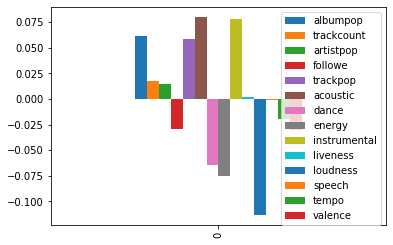

In [ ]:
score = liveness_album_score_corr['score']
score[0]

data_corr = {'albumpop' : popularity_album_score_corr['score'][0],
        'trackcount' : trackcount_album_score_corr['score'][0],
        'artistpop' : artistpop_album_score_corr['score'][0],
        'followe' : followers_album_score_corr['score'][0],
        'trackpop' : trackpop_album_score_corr['score'][0],
        'acoustic' : acoustic_album_score_corr['score'][0],
        'dance' : dance_album_score_corr['score'][0],
        'energy' : energy_album_score_corr['score'][0],
        'instrumental' : instrumental_album_score_corr['score'][0],
        'liveness' : liveness_album_score_corr['score'][0],
        'loudness' : loudness_album_score_corr ['score'][0],
        'speech' : speechiness_album_score_corr['score'][0],
        'tempo' : tempo_album_score_corr['score'][0],
        'valence' : valence_album_score_corr['score'][0]
        }


df_data_corr = pd.DataFrame(data_corr, index=[0])








ax = df_data_corr.plot.bar()


Cov Time

In [ ]:
popularity_album_score_cov = popularity_album_score.cov()
trackcount_album_score_cov = trackcount_album_score.cov()
artistpop_album_score_cov = artistpop_album_score.cov()
followers_album_score_cov = followers_album_score.cov()
trackpop_album_score_cov = trackpop_album_score.cov()
acoustic_album_score_cov = acoustic_album_score.cov()
dance_album_score_cov = dance_album_score.cov()
energy_album_score_cov = energy_album_score.cov()
instrumental_album_score_cov = instrumental_album_score.cov()
liveness_album_score_cov = liveness_album_score.cov()
loudness_album_score_cov = loudness_album_score.cov()
speechiness_album_score_cov = speechiness_album_score.cov()
tempo_album_score_cov = tempo_album_score.cov()
valence_album_score_cov = valence_album_score.cov()

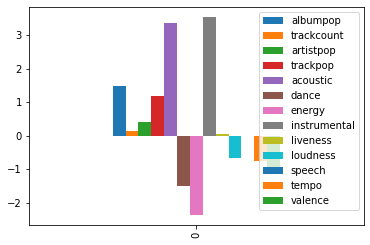

In [ ]:


data_cov = {'albumpop' : popularity_album_score_cov['score'][0],
        'trackcount' : trackcount_album_score_cov['score'][0],
        'artistpop' : artistpop_album_score_cov['score'][0],
        #'followe' : followers_album_score_cov['score'][0],
        'trackpop' : trackpop_album_score_cov['score'][0],
        'acoustic' : acoustic_album_score_cov['score'][0],
        'dance' : dance_album_score_cov['score'][0],
        'energy' : energy_album_score_cov['score'][0],
        'instrumental' : instrumental_album_score_cov['score'][0],
        'liveness' : liveness_album_score_cov['score'][0],
        'loudness' : loudness_album_score_cov['score'][0],
        'speech' : speechiness_album_score_cov['score'][0],
        'tempo' : tempo_album_score_cov['score'][0],
        'valence' : valence_album_score_cov['score'][0]
        }


df_data_cov = pd.DataFrame(data_cov, index=[0])








ax = df_data_cov.plot.bar()

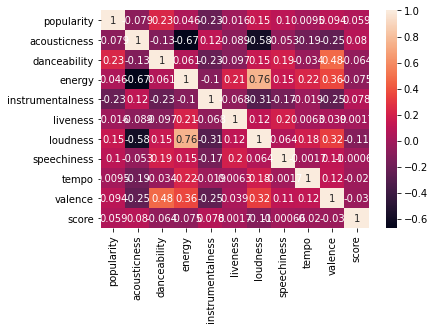

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,score
0,15,56.40000,66.7,26.5,0.00000,66.10,-20.063,91.20,112.880,67.9,4.0
1,21,12.70000,65.5,70.9,7.81000,45.90,-7.811,7.13,136.038,68.0,4.0
2,13,69.90000,66.9,20.3,0.00000,9.73,-19.691,90.20,118.245,71.0,4.0
3,18,6.87000,50.9,87.4,0.00220,43.10,-4.515,4.37,136.051,69.2,4.0
4,12,69.20000,71.0,21.7,0.00000,20.80,-16.987,89.10,121.194,67.8,4.0
...,...,...,...,...,...,...,...,...,...,...,...
191758,11,0.87700,37.6,66.4,0.00173,10.80,-7.605,3.03,106.127,38.4,7.4
191759,11,0.13800,40.1,85.0,0.06960,7.74,-8.379,5.79,123.587,30.8,7.4
191760,10,3.61000,32.3,93.3,0.04250,4.60,-7.893,7.05,116.437,61.4,7.4
191761,11,0.16900,44.9,68.7,0.03500,10.20,-7.997,2.99,130.989,59.4,7.4


In [ ]:
data_corr_total = { 'popularity' : matched_data_tracksid['popularity'],
'acousticness' : matched_data_tracksid['acousticness'],
'danceability' : matched_data_tracksid['danceability'],
'energy' : matched_data_tracksid['energy'],
'instrumentalness' : matched_data_tracksid['instrumentalness'],
'liveness' : matched_data_tracksid['liveness'],
'loudness' : matched_data_tracksid['loudness'],
'speechiness' : matched_data_tracksid['speechiness'],
'tempo' : matched_data_tracksid['tempo'],
'valence' : matched_data_tracksid['valence'],
'score' : matched_data_tracksid['score']
}

df_data_corr_total = pd.DataFrame(data_corr_total)


df_data_corr_total_corr = df_data_cov_total.corr()

sb.heatmap(df_data_corr_total_corr, annot=True)
plt.show()

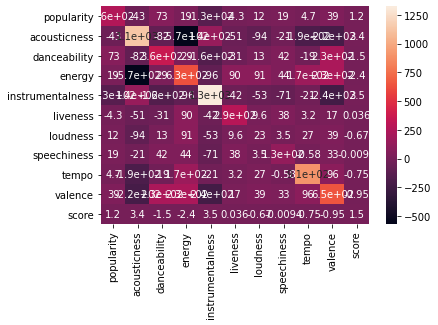

In [ ]:
data_cov_total = { 'popularity' : matched_data_tracksid['popularity'],
'acousticness' : matched_data_tracksid['acousticness'],
'danceability' : matched_data_tracksid['danceability'],
'energy' : matched_data_tracksid['energy'],
'instrumentalness' : matched_data_tracksid['instrumentalness'],
'liveness' : matched_data_tracksid['liveness'],
'loudness' : matched_data_tracksid['loudness'],
'speechiness' : matched_data_tracksid['speechiness'],
'tempo' : matched_data_tracksid['tempo'],
'valence' : matched_data_tracksid['valence'],
'score' : matched_data_tracksid['score']
}

df_data_cov_total = pd.DataFrame(data_cov_total)


df_data_cov_total_cov = df_data_cov_total.cov()

sb.heatmap(df_data_cov_total_cov, annot=True)
plt.show()